In [3]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import itertools as itr

In [4]:
beta=1.0
J=-1.0
x=20
y=20
steps=100000
d=0.3

In [5]:
def initiate():
    np.random.shuffle(l)
    for n in range(math.floor(d*len(l))):
        i=l[n]%y
        j=l[n]//x
        s[i][j]=-1

In [6]:
#In this case, periodic bundary conditions is setted only one direction
def nearest_neighbour(r):
    nn=list()
    if r>=x:
        nn.append(r-x)

    if r<x*(y-1):
        nn.append(r+x)

    if (r%y)==0:
        nn.append(r+x-1)
    else:
        nn.append(r-1)
        
    if ((r+1)%y)==0:
        nn.append(r-x+1)
    else:
        nn.append(r+1)
        
    return nn 

In [7]:
#In this case, periodic bundary conditions is setted two directions
def nearest_neighbour1(r):
    nn=list()
    if r>=x:
        nn.append(r-x)
    else:
        nn.append(r+x*(y-1))
        
    if r<x*(y-1):
        nn.append(r+x)
    else:
        nn.append(r-x*(y-1))
        
    if (r%y)==0:
        nn.append(r+x-1)
    else:
        nn.append(r-1)
        
    if ((r+1)%y)==0:
        nn.append(r-x+1)
    else:
        nn.append(r+1)
        
    return nn 

In [8]:
def exchange(r1,r2):
    s[l[r1]%y][l[r1]//x],s[l[r2]%y][l[r2]//x]=s[l[r2]%y][l[r2]//x],s[l[r1]%y][l[r1]//x]
    l[r1],l[r2]=l[r2],l[r1]

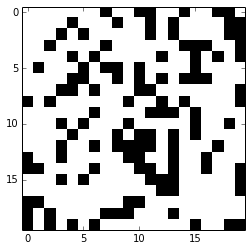

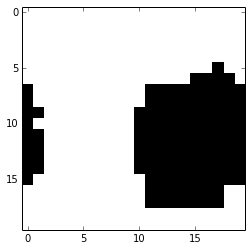

In [9]:
s=np.ones((x,y))
l=np.array(range(x*y))
initiate()
plt.imshow(s, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
for t in range(steps):
    R1=np.random.randint(x*y*d)
    R2=math.floor(x*y*d)+np.random.randint(x*y*(1-d))
    rand1=l[R1]
    rand2=l[R2]
    exchange(R1,R2)
    nn1=nearest_neighbour1(rand1)
    nn2=nearest_neighbour1(rand2)
    S=0
    for o in range(len(nn1)):
        i=nn1[o]%y
        j=nn1[o]//x
        S+=s[i][j]
    E=2*J*s[rand1%y][rand1//x]*S
    S=0
    for o in range(len(nn2)):
        i=nn2[o]%y
        j=nn2[o]//x
        S+=s[i][j]
    E+=(2*J*s[rand2%y][rand2//x]*S)
    if E>0:
        p=random.uniform(0,1)
        if p>np.exp(-beta*E):
            exchange(R1,R2)
plt.imshow(s, cmap=plt.cm.gray, interpolation='nearest')